# Mudança de Frequência de Amostragem


Mudança de frequência de amostragem é uma técnica que pode ser necessária em diversas situações. Suponha que dois sinais tenham sido digitalizados com frequências de amostragem diferentes, neste caso, para somá-los, é necessários realizar a mudança da frequência de amostragem para que ambos estejam na mesma taxa. Outra situação em que podemos utilizar a mudança de frequência de amostragem é para ajustá-la de acordo com as características do sinal. Por exemplo, um sinal de fala possui a maior parte de sua energia até, aproximadamente, 4 kHz. Um sinal de fala gravado a 44.1kHz pode ser ajustado para 8820Hz, sem perder informação significativa do sinal. Assim será possível utilizar menos amostras para representá-lo. Para melhor visualizar o espectrograma do sinal de fala também é conveniente realizar uma reamostragem, mantendo apenas a informação relevante. Algumas técnicas também fazem uso da mudança de frequência de amostragem, como por exemplo: oversampling, decomposição polifásica de filtros e processamento de sinais multi-taxa. As operações envolvidas na mudança de frequência de amostragem são:

* downsample
* upsample
* decimação 
* filtro anti-aliasing
* interpolação



In [1]:
pkg load signal

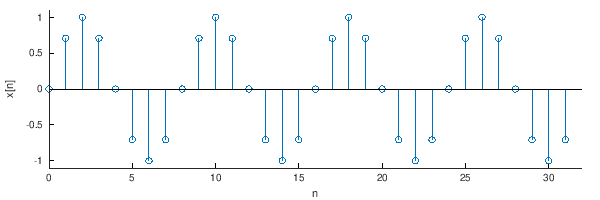

In [13]:
n_samples = 32;
n = [0:n_samples-1];
x = sin(n*pi/4);
figure(1, 'position',[0,0,600,200]);
stem(n,x); xlabel('n'); ylabel('x[n]'); ylim([-1.1, 1.1]); xlim([0, n(end)+1]);

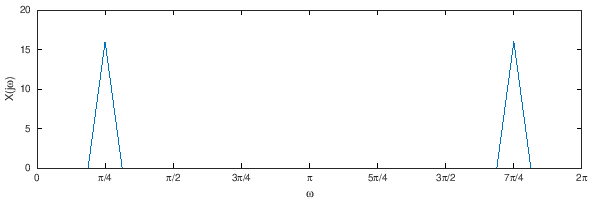

In [3]:
X = fft(x);
figure(2, 'position',[0,0,600,200]);
w = linspace(0,2*pi,length(n)+1); w = w(1:end-1);
plot(w,abs(X)); xlim([0 2*pi]); xlabel('\omega'); ylabel('X(j\omega)');
set(gca,'xtick',[0 pi/4 pi/2 3*pi/4 pi 5*pi/4 3*pi/2 7*pi/4 2*pi]); 
set(gca,'xticklabel',{'0', '\pi/4', '\pi/2', '3\pi/4', '\pi', '5\pi/4', '3\pi/2', '7\pi/4', '2\pi'});

In [4]:
help downsample

'downsample' is a function from the file /usr/share/octave/packages/signal-1.4.1/downsample.m

 -- Function File: Y = downsample (X, N)
 -- Function File: Y = downsample (X, N, OFFSET)
     Downsample the signal, selecting every Nth element.  If X is a
     matrix, downsample every column.

     For most signals you will want to use 'decimate' instead since it
     prefilters the high frequency components of the signal and avoids
     aliasing effects.

     If OFFSET is defined, select every Nth element starting at sample
     OFFSET.

     See also: decimate, interp, resample, upfirdn, upsample.

Additional help for built-in functions and operators is
available in the online version of the manual.  Use the command
'doc <topic>' to search the manual index.

Help and information about Octave is also available on the WWW
at https://www.octave.org and via the help@octave.org
mailing list.


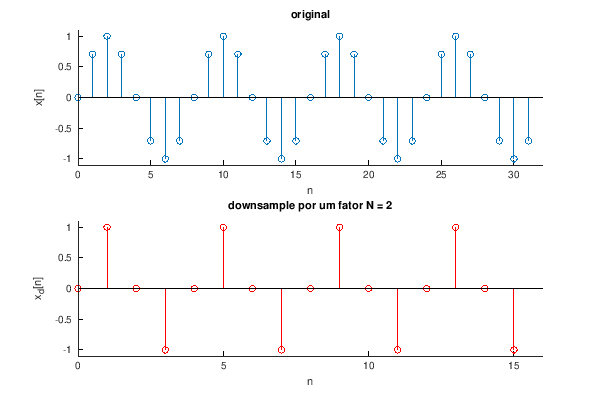

In [5]:
N = 2; % fator de downsample
xd = downsample(x,N);
nd = [0:length(xd)-1];
figure(3, 'position',[0,0,600,400]);
subplot(2,1,1);
stem(n,x); xlabel('n'); ylabel('x[n]'); ylim([-1.1, 1.1]); xlim([0, n(end)+1]); title('original');
subplot(2,1,2);
stem(nd,xd,'r'); xlabel('n'); ylabel('x_d[n]'); ylim([-1.1, 1.1]); xlim([0 nd(end)+1]);
title(sprintf('downsample por um fator N = %d',N));

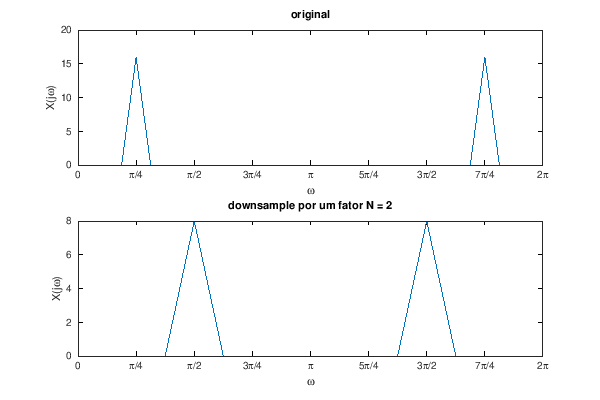

In [6]:
Xd = fft(xd);
figure(4, 'position',[0,0,600,400]);
wd = linspace(0,2*pi,length(nd)+1); wd = wd(1:end-1);
subplot(2,1,1);
plot(w,abs(X)); xlim([0 2*pi]); xlabel('\omega'); ylabel('X(j\omega)'); title('original');
set(gca,'xtick',[0 pi/4 pi/2 3*pi/4 pi 5*pi/4 3*pi/2 7*pi/4 2*pi]); 
set(gca,'xticklabel',{'0', '\pi/4', '\pi/2', '3\pi/4', '\pi', '5\pi/4', '3\pi/2', '7\pi/4', '2\pi'});
subplot(2,1,2);
plot(wd,abs(Xd)); xlim([0 2*pi]); xlabel('\omega'); ylabel('X(j\omega)');
set(gca,'xtick',[0 pi/4 pi/2 3*pi/4 pi 5*pi/4 3*pi/2 7*pi/4 2*pi]); 
set(gca,'xticklabel',{'0', '\pi/4', '\pi/2', '3\pi/4', '\pi', '5\pi/4', '3\pi/2', '7\pi/4', '2\pi'});
title(sprintf('downsample por um fator N = %d',N));

Note como ocorreu um estiramento na frequência por um fator $N$ e a amplitude sofreu a multiplicação por um fator $1/N$.

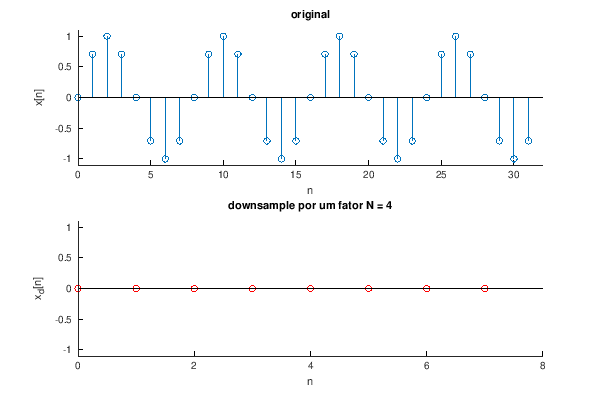

In [7]:
N = 4; % fator de downsample
xdd = downsample(x,N);
ndd = [0:length(xdd)-1];
figure(5, 'position',[0,0,600,400]);
subplot(2,1,1);
stem(n,x); xlabel('n'); ylabel('x[n]'); ylim([-1.1, 1.1]); xlim([0, n(end)+1]); title('original');
subplot(2,1,2);
stem(ndd,xdd,'r'); xlabel('n'); ylabel('x_d[n]'); ylim([-1.1, 1.1]); xlim([0 ndd(end)+1]); 
title(sprintf('downsample por um fator N = %d',N));

In [8]:
help upsample

'upsample' is a function from the file /usr/share/octave/packages/signal-1.4.1/upsample.m

 -- Function File: Y = upsample (X, N)
 -- Function File: Y = upsample (X, N, OFFSET)
     Upsample the signal, inserting N-1 zeros between every element.

     If X is a matrix, upsample every column.

     If OFFSET is specified, control the position of the inserted sample
     in the block of N zeros.

     See also: decimate, downsample, interp, resample, upfirdn.

Additional help for built-in functions and operators is
available in the online version of the manual.  Use the command
'doc <topic>' to search the manual index.

Help and information about Octave is also available on the WWW
at https://www.octave.org and via the help@octave.org
mailing list.


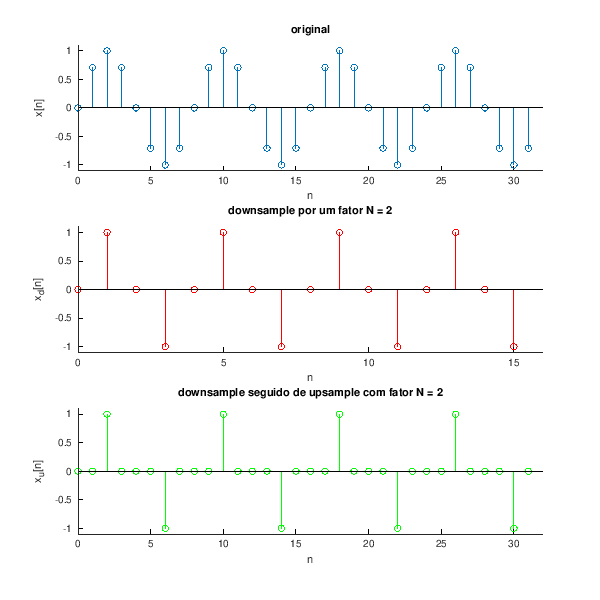

In [11]:
N = 2;
xu = upsample(xd,N);
figure(6, 'position',[0,0,600,600]);
subplot(3,1,1);
stem(n,x); xlabel('n'); ylabel('x[n]'); ylim([-1.1, 1.1]); xlim([0, n(end)+1]); title('original');
subplot(3,1,2);
stem(nd,xd,'r'); xlabel('n'); ylabel('x_d[n]'); ylim([-1.1, 1.1]); xlim([0 nd(end)+1]);
title(sprintf('downsample por um fator N = %d',N));
subplot(3,1,3);
stem(n,xu,'g'); xlabel('n'); ylabel('x_u[n]'); ylim([-1.1, 1.1]); xlim([0 n(end)+1]);
title(sprintf('downsample seguido de upsample com fator N = %d',N));

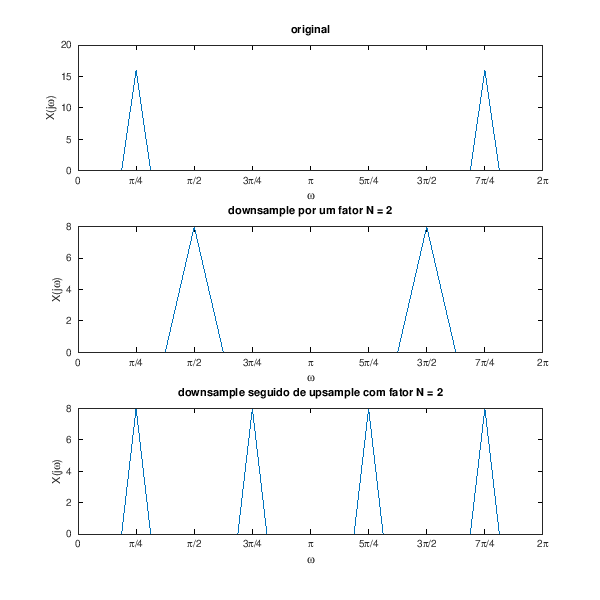

In [12]:
Xu = fft(xu);
figure(7, 'position',[0,0,600,600]);
subplot(3,1,1);
plot(w,abs(X)); xlim([0 2*pi]); xlabel('\omega'); ylabel('X(j\omega)'); title('original');
set(gca,'xtick',[0 pi/4 pi/2 3*pi/4 pi 5*pi/4 3*pi/2 7*pi/4 2*pi]); 
set(gca,'xticklabel',{'0', '\pi/4', '\pi/2', '3\pi/4', '\pi', '5\pi/4', '3\pi/2', '7\pi/4', '2\pi'});
subplot(3,1,2);
plot(wd,abs(Xd)); xlim([0 2*pi]); xlabel('\omega'); ylabel('X(j\omega)');
set(gca,'xtick',[0 pi/4 pi/2 3*pi/4 pi 5*pi/4 3*pi/2 7*pi/4 2*pi]); 
set(gca,'xticklabel',{'0', '\pi/4', '\pi/2', '3\pi/4', '\pi', '5\pi/4', '3\pi/2', '7\pi/4', '2\pi'});
title(sprintf('downsample por um fator N = %d',N));
subplot(3,1,3);
plot(w,abs(Xu)); xlim([0 2*pi]); xlabel('\omega'); ylabel('X(j\omega)');
set(gca,'xtick',[0 pi/4 pi/2 3*pi/4 pi 5*pi/4 3*pi/2 7*pi/4 2*pi]); 
set(gca,'xticklabel',{'0', '\pi/4', '\pi/2', '3\pi/4', '\pi', '5\pi/4', '3\pi/2', '7\pi/4', '2\pi'});
title(sprintf('downsample seguido de upsample com fator N = %d',N));

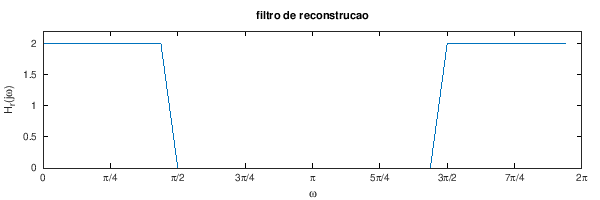

In [21]:
Hr = N*[ones(1,n_samples/4) zeros(1,n_samples/2) ones(1,n_samples/4)];
figure(8, 'position',[0,0,600,200]);
plot(w,abs(Hr)); xlim([0 2*pi]); xlabel('\omega'); ylabel('H_r(j\omega)'); ylim([0 N*1.1]);
title('filtro de reconstrucao');
set(gca,'xtick',[0 pi/4 pi/2 3*pi/4 pi 5*pi/4 3*pi/2 7*pi/4 2*pi]); 
set(gca,'xticklabel',{'0', '\pi/4', '\pi/2', '3\pi/4', '\pi', '5\pi/4', '3\pi/2', '7\pi/4', '2\pi'});

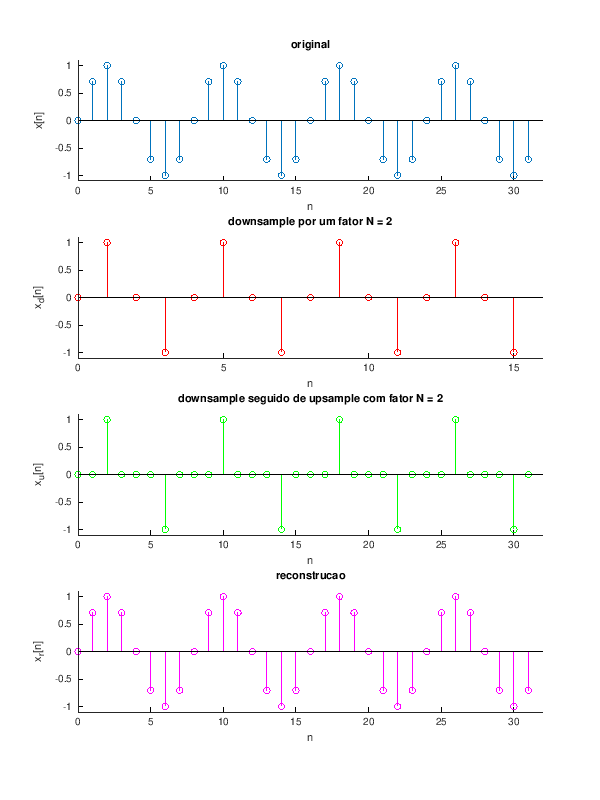

In [23]:
Xr = Xu.*Hr;
xr = ifft(Xr);
figure(9, 'position',[0,0,600,800]);
subplot(4,1,1);
stem(n,x); xlabel('n'); ylabel('x[n]'); ylim([-1.1, 1.1]); xlim([0, n(end)+1]); title('original');
subplot(4,1,2);
stem(nd,xd,'r'); xlabel('n'); ylabel('x_d[n]'); ylim([-1.1, 1.1]); xlim([0 nd(end)+1]);
title(sprintf('downsample por um fator N = %d',N));
subplot(4,1,3);
stem(n,xu,'g'); xlabel('n'); ylabel('x_u[n]'); ylim([-1.1, 1.1]); xlim([0 n(end)+1]);
title(sprintf('downsample seguido de upsample com fator N = %d',N));
subplot(4,1,4);
stem(n,xr,'m'); xlabel('n'); ylabel('x_r[n]'); ylim([-1.1, 1.1]); xlim([0 n(end)+1]);
title('reconstrucao');